In [1]:
import numpy as np
import sys
sys.path.extend(['/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.9/site-packages'])

from manifolds.model_spaces import Hypersphere
from analyzers.analyzers import CurvatureConvergenceAnalyzer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sphere = Hypersphere()

In [107]:
connectivities = 0.05 / np.arange(1,2)
scales = 0.3 / np.arange(1,2)
intensities = 8000 * np.arange(1,2)
root = np.array([1, 0, 0])

analyzer = CurvatureConvergenceAnalyzer(sphere, root)
analyzer.analyze(connectivities, scales, intensities, algorithm="dijkstra", num_runs=1)

INFO: Analyzer: Point density factor: 20.000000000000004
INFO: Analyzer: Geodesic approximation factor: 5.999999999999999
INFO: Manifold: Sampled 7964 points.
INFO: Geometric graph: Computing pairwise ambient distances...
INFO: Geometric graph: Kept 669 points from a fixed ambient neighbourhood.
INFO: Geometric graph: Kept 669 points in a fixed interconnectivity neighbourhood.
INFO: Geometric graph: Kept 669 points at given random walk scale.
INFO: Geometric graph: Computing graph distances...
100%|██████████| 669/669 [00:25<00:00, 26.75it/s]
INFO: Geometric graph: Generating target point.


ZeroDivisionError: division by zero

Plotting sample curvatures:

/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Fut

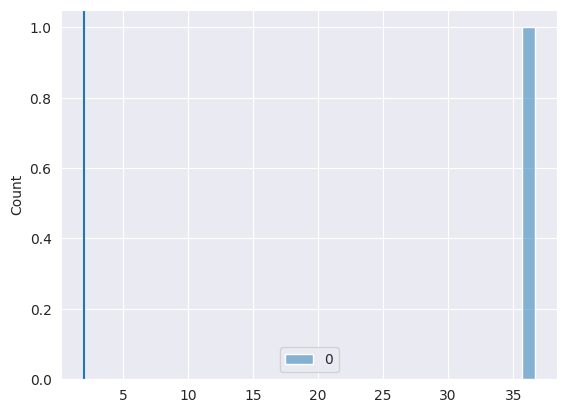

In [101]:
fig, ax = plt.subplots()

sns.histplot(analyzer.sample_curvatures[0], ax=ax)
ax.axvline(2)

/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


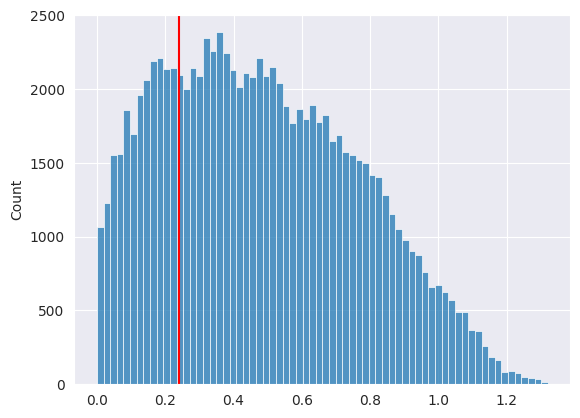

In [102]:
fig, ax = plt.subplots()

sns.histplot(analyzer.geometric_graph.graph_distances.ravel(), ax=ax)
ax.axvline(analyzer.geometric_graph.distance_to_target /2, color='r')

/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


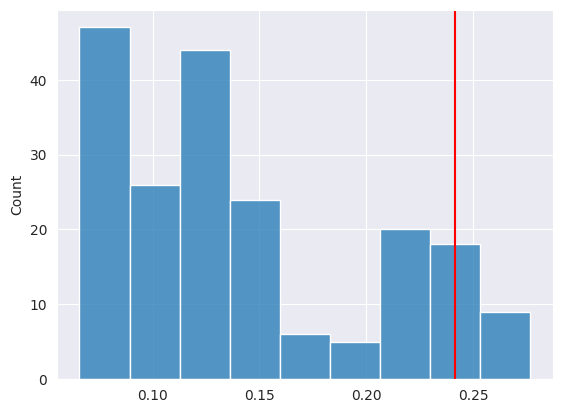

In [103]:
fig, ax = plt.subplots()

sns.histplot(analyzer.geometric_graph.midpoint_distances, ax=ax)
ax.axvline(analyzer.geometric_graph.distance_to_target /2, color='r')

In [104]:
mdp_distances = np.array(analyzer.geometric_graph.midpoint_distances)
mdp_distances_constr = mdp_distances[(mdp_distances < analyzer.geometric_graph.distance_to_target / 2) & (mdp_distances > 0.15)]
8 / scales[0]**2 * (1 - 2* sum(mdp_distances_constr) / len(mdp_distances_constr) / analyzer.geometric_graph.distance_to_target)

array([11.69433675])

/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benedikt/GitHub/geometric-coarse-curvature/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


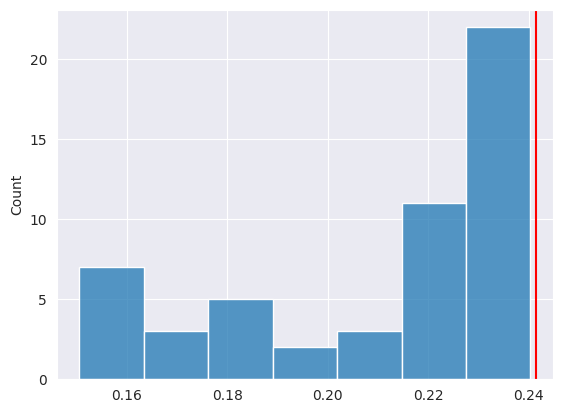

In [105]:
fig, ax = plt.subplots()

sns.histplot(mdp_distances_constr, ax=ax)
ax.axvline(analyzer.geometric_graph.distance_to_target /2, color='r')